In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

%matplotlib inline

In [2]:
df=pd.read_csv('avocado.csv')

## Columns of interest

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [3]:
df.drop(columns=['Unnamed: 0','Total Bags','Small Bags','Large Bags','XLarge Bags'],inplace=True)

In [4]:
df.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'},inplace=True)

In [5]:
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   PLU_4046      18249 non-null  float64
 4   PLU_4225      18249 non-null  float64
 5   PLU_4770      18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.Date.nunique()

169

In [9]:
df.describe()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,2018.000000


# Analysis

In [10]:
# Total avocada of each type
pd.value_counts(df['type'])

conventional    9126
organic         9123
Name: type, dtype: int64

#### Avocado sold per type

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64


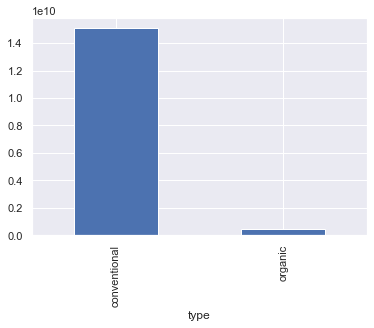

In [11]:
avocado_type = df.groupby(['type'])['Total Volume'].sum()
print(avocado_type)
avocado_type.plot.bar();

#### Avocado prices per type in each year

In [12]:
price = df.groupby(['type','year'])['AveragePrice'].mean().reset_index()

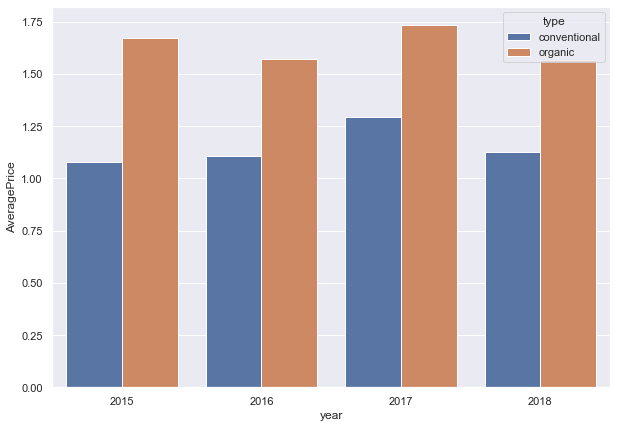

In [13]:
plt.figure(figsize=(10,7));
ax = sns.barplot(x="year", y="AveragePrice", hue="type", data=price)

#### Avocado sold in each region

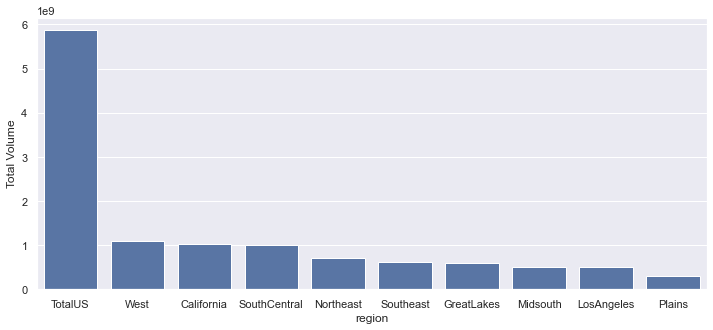

In [14]:
region = df.groupby(['region'])['Total Volume'].sum().reset_index()
top_region = region.nlargest(10,'Total Volume')
plt.figure(figsize=(12,5));
ax = sns.barplot(x="region", y="Total Volume", data=top_region,color="b")

In [15]:
total_us = df[df.region=='TotalUS'].index

In [16]:
df.drop(total_us,inplace=True)

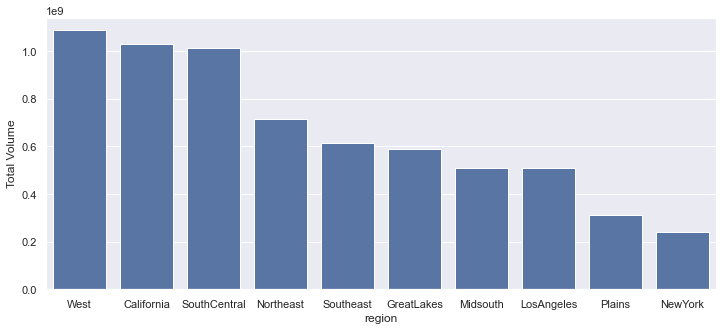

In [17]:
region = df.groupby(['region'])['Total Volume'].sum().reset_index()
top_region = region.nlargest(10,'Total Volume')
plt.figure(figsize=(12,5));
ax = sns.barplot(x="region", y="Total Volume", data=top_region,color="b")

#### Avocado records per year

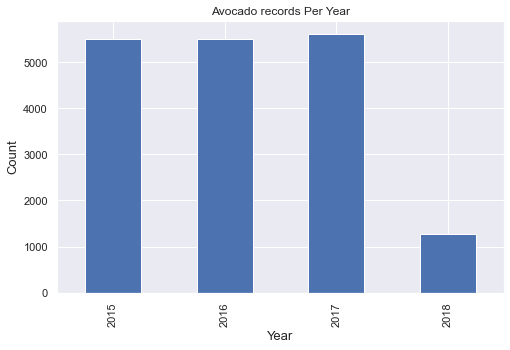

In [18]:
# Avocado records per each year
plt.figure(figsize=(8,5));
lt = df.year.value_counts().sort_index(ascending=True).plot.bar()
lt.set(title = 'Avocado records Per Year')
lt.set_xlabel('Year', fontsize = '13')
lt.set_ylabel('Count', fontsize = '13')
plt.show()

#### Avocado sold per year

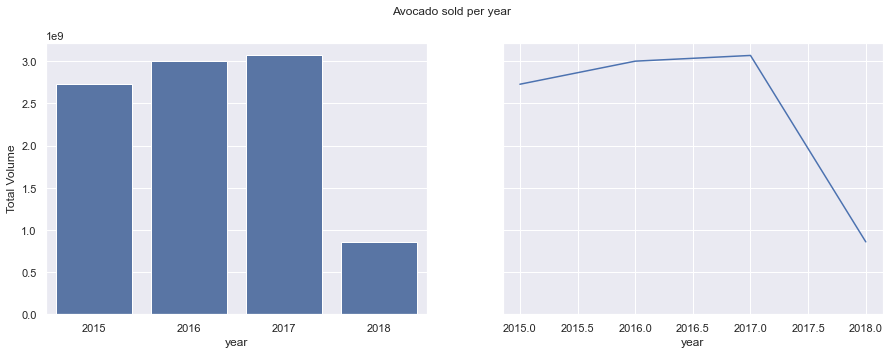

In [19]:
sold_per_year = df.groupby(['year'])['Total Volume'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True);
fig.suptitle('Avocado sold per year');

sns.barplot(x="year", y="Total Volume", ax= axes[0] ,data=sold_per_year,color="b");
sns.lineplot(x=sold_per_year['year'],y=sold_per_year['Total Volume'], ax= axes[1]);

#### Average price of Avocado per year

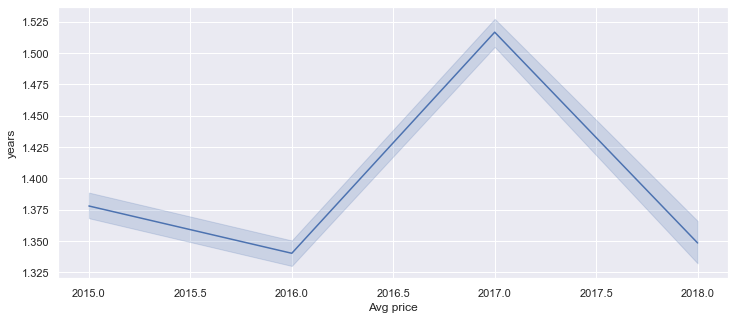

In [20]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df['year'],y=df['AveragePrice'])
plt.xlabel('Avg price')
plt.ylabel('years')
plt.show()
#price_per_year = df.groupby(['year'])['AveragePrice'].mean().reset_index()

# Time Series
A time series is a sequence of numerical data points in successive order.

### Average price weekly

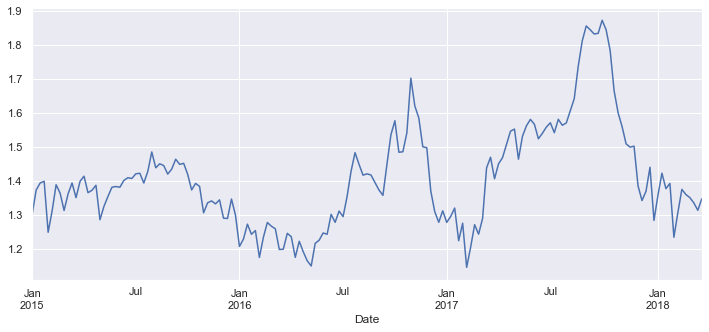

In [21]:
df_date = df.groupby(['Date'])['AveragePrice'].mean()
df_date = df_date.to_frame(name='AveragePrice')
# Price
plt.figure(figsize=(12,5))
df_date['AveragePrice'].plot();

let's check yearly now

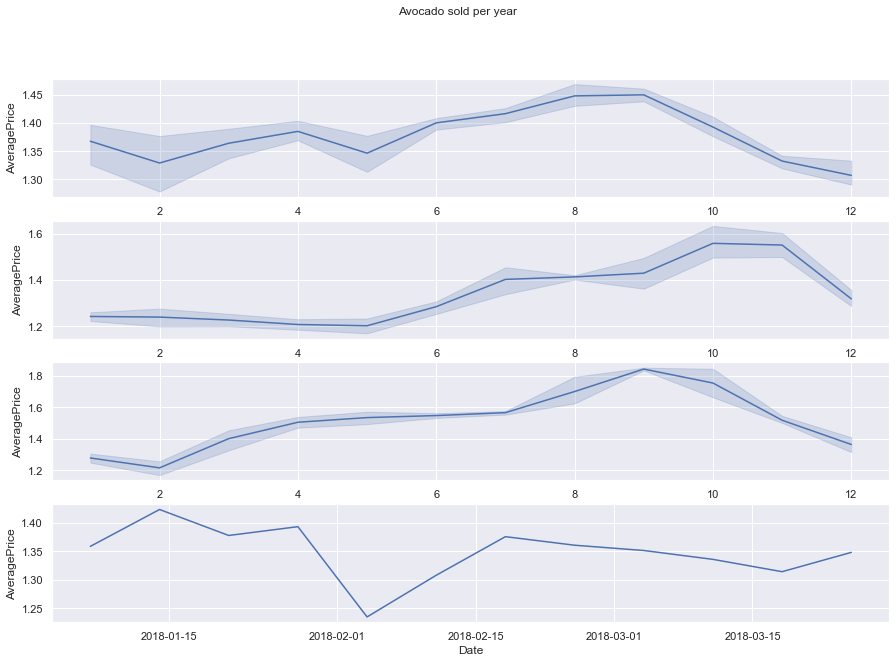

In [22]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10), sharex=False);
fig.suptitle('Avocado sold per year');

df_2015 = df_date.loc['2015']
sns.lineplot(x=df_2015.index.month,y=df_2015['AveragePrice'], ax= axes[0]);

df_2016 = df_date.loc['2016']
sns.lineplot(x=df_2016.index.month,y=df_2016['AveragePrice'], ax= axes[1]);

df_2017 = df_date.loc['2017']
sns.lineplot(x=df_2017.index.month,y=df_2017['AveragePrice'], ax= axes[2]);

df_2018 = df_date.loc['2018']
sns.lineplot(x=df_2018.index,y=df_2018['AveragePrice'], ax= axes[3]);

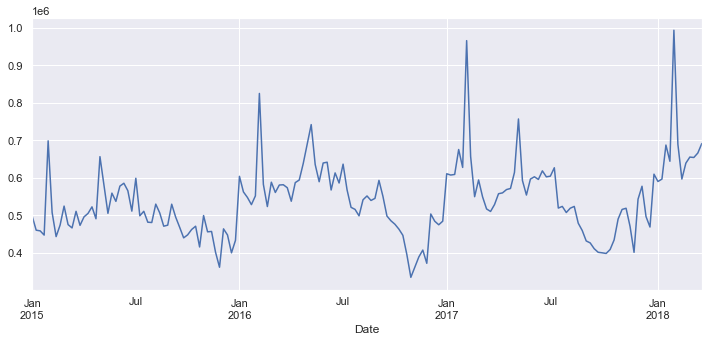

In [23]:
df_date_sold = df.groupby(['Date'])['Total Volume'].mean()
df_date_sold = df_date_sold.to_frame(name='Total Volume')
plt.figure(figsize=(12,5))
df_date_sold['Total Volume'].plot();

# Stationary time series
stationarity means that the statistical properties of a process generating a time series do not change over time.
- Constant mean
- Constant Standard deviation
- No seasonality (a regularly repeating pattern of highs and lows related to calendar time)
![title](img/stationary.png)

### Organic Avocados

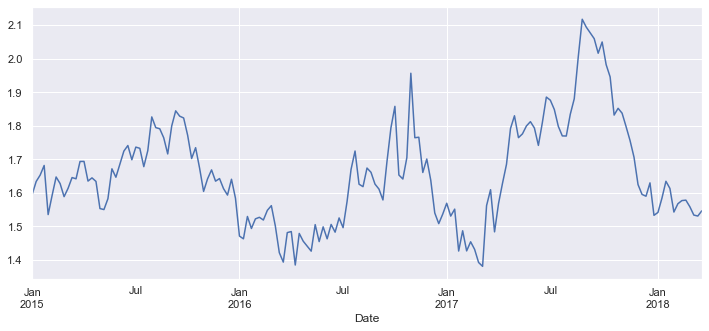

In [24]:
df_date_organic = df[(df.type=="organic")].groupby(['Date'])['AveragePrice'].mean()
df_date_organic = df_date_organic.to_frame(name='AveragePrice')
# Price
plt.figure(figsize=(12,5))
df_date_organic['AveragePrice'].plot();

### Unit root tests
Tests for presence of unit root (Non stationary)

### Augmented Dickey Fuller 
We are testing as our null hypothesis that our time-series is actually non-stationary

- Null Hypothesis (H0): It is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): It is stationary. It does not have time-dependent structure.
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary. 

In [25]:
from statsmodels.tsa.stattools import adfuller

X = df_date_organic['AveragePrice'].values
result = adfuller(X, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if(result[1] > 0.05):
    print("series is non-stationary")
else:
    print("series is stationary")

ADF Statistic: -3.282771
p-value: 0.015666
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577
series is stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

- Null Hypothesis (H0): series is stationary.
- Alternate Hypothesis (H1): series is non-stationary.
- p-value > 0.05: Fail to reject the null hypothesis (H0), and series is stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), series is non-stationary. 

In [26]:
# KPSS test
from statsmodels.tsa.stattools import kpss

X = df_date_organic['AveragePrice'].values
statistic, p_value, n_lags, critical_values = kpss(X, nlags='auto')
print('ADF Statistic: %f' % statistic)
print('p-value: %f' % p_value)
print('num lags: %f' % n_lags)
print('Critical Values:')
for key, value in critical_values.items():
    print('\t%s: %.3f' % (key, value))

if(p_value > 0.05):
    print("series is stationary")
else:
    print("series is not stationary")

ADF Statistic: 0.233701
p-value: 0.100000
num lags: 8.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
series is stationary


In [27]:
train_size = int(len(df_date_organic) * 0.75)
train_organic, test_organic = df_date_organic[0:train_size], df_date_organic[train_size:]

In [28]:
train_organic

,AveragePrice
Date,
2015-01-04,1.595472
2015-01-11,1.633962
2015-01-18,1.653019
2015-01-25,1.681698
2015-02-01,1.535283
...,...
2017-04-30,1.829811
2017-05-07,1.764528
2017-05-14,1.775849


# Arima

- AR: Autoregression
- I: Integrated
- MA: Moving Average

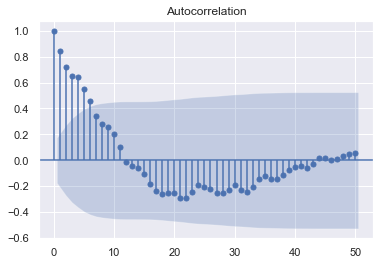

In [29]:
sm.graphics.tsa.plot_acf(train_organic.AveragePrice, lags=50)
plt.show()

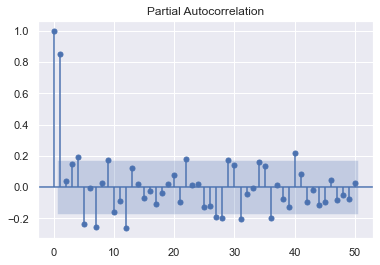

In [30]:
sm.graphics.tsa.plot_pacf(train_organic.AveragePrice, lags=50)
plt.show()

In [31]:
train_organic.index = pd.DatetimeIndex(train_organic.index.values,
                               freq=train_organic.index.inferred_freq)

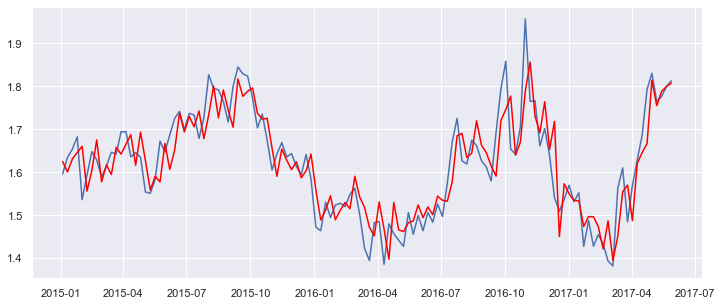

In [32]:
model = ARIMA(train_organic, order=(5,0,7))
results = model.fit()
plt.figure(figsize=(12,5))
plt.plot(train_organic);
plt.plot(results.fittedvalues, color='red');

In [33]:
print("\tMean Squared Error:", mean_squared_error(train_organic['AveragePrice'], results.fittedvalues))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(train_organic['AveragePrice'],results.fittedvalues)))

	Mean Squared Error: 0.003105707570831976
	Root Mean Squared Error: 0.055728875556859896


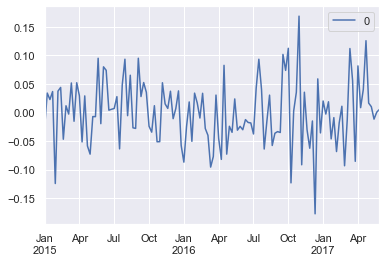

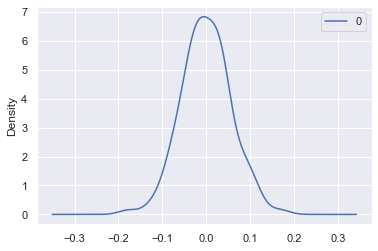

In [34]:
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [35]:
history = [x for x in train_organic.AveragePrice]
predictions = list()
test_data = [x for x in test_organic.AveragePrice]

for i in range(len(test_data)):
    model = ARIMA(history, order=(6,0,12))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.805838, expected=1.793396
predicted=1.747902, expected=1.741509
predicted=1.735200, expected=1.809808
predicted=1.821560, expected=1.885577
predicted=1.863691, expected=1.876226
predicted=1.754449, expected=1.848491
predicted=1.798045, expected=1.798302
predicted=1.753907, expected=1.769811
predicted=1.774267, expected=1.769434
predicted=1.734735, expected=1.834151
predicted=1.738566, expected=1.880566
predicted=1.832064, expected=2.004906
predicted=1.955691, expected=2.117547
predicted=2.073589, expected=2.094340
predicted=2.033192, expected=2.077358
predicted=2.088750, expected=2.059811
predicted=2.055042, expected=2.016226
predicted=1.992143, expected=2.049811
predicted=2.069813, expected=1.982264
predicted=1.946400, expected=1.945660
predicted=1.967679, expected=1.831887
predicted=1.872533, expected=1.852075
predicted=1.819101, expected=1.837547
predicted=1.836813, expected=1.797547
predicted=1.711889, expected=1.755849
predicted=1.764578, expected=1.705849
predicted=1.

In [36]:
error = mean_squared_error(test_organic, predictions)
print("\tMean Squared Error:", mean_squared_error(test_organic, predictions))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(test_organic,predictions)))

	Mean Squared Error: 0.004276755931613188
	Root Mean Squared Error: 0.06539691071918602


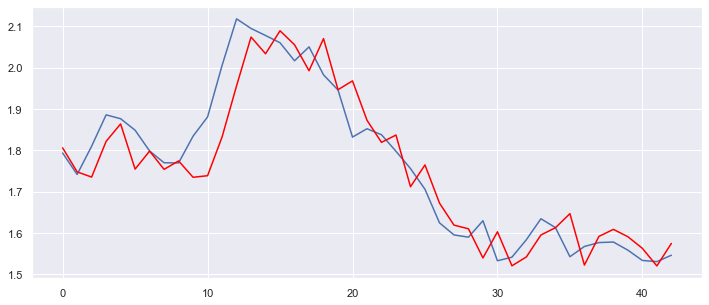

In [37]:
plt.figure(figsize=(12,5))
plt.plot(test_organic.values);
plt.plot(predictions, color='red');

## conventional

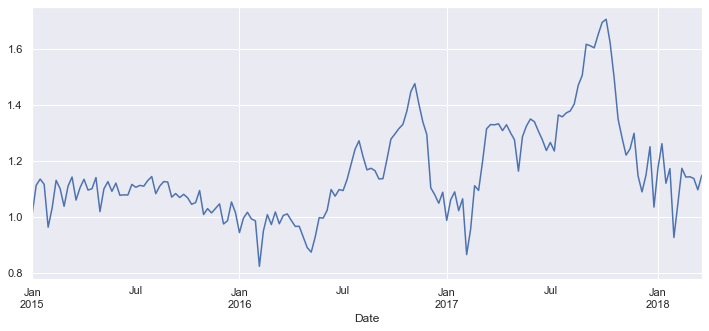

In [38]:
df_date_conventional = df[(df.type=="conventional")].groupby(['Date'])['AveragePrice'].mean()
df_date_conventional = df_date_conventional.to_frame(name='AveragePrice')
# Price
plt.figure(figsize=(12,5))
df_date_conventional['AveragePrice'].plot();

### Augmented Dickey Fuller 
We are testing as our null hypothesis that our time-series is actually non-stationary

- Null Hypothesis (H0): It is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): It is stationary. It does not have time-dependent structure.
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary. 

In [39]:
from statsmodels.tsa.stattools import adfuller

X = df_date_conventional['AveragePrice'].values
result = adfuller(X, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if(result[1] > 0.05):
    print("series is non-stationary")
else:
    print("series is stationary")

ADF Statistic: -2.095094
p-value: 0.246492
Critical Values:
	1%: -3.472
	5%: -2.880
	10%: -2.577
series is non-stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

- Null Hypothesis (H0): series is stationary.
- Alternate Hypothesis (H1): series is non-stationary.
- p-value > 0.05: Fail to reject the null hypothesis (H0), and series is stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), series is non-stationary. 

In [40]:
# KPSS test
from statsmodels.tsa.stattools import kpss

X = df_date_conventional['AveragePrice'].values
statistic, p_value, n_lags, critical_values = kpss(X, nlags='auto')
print('ADF Statistic: %f' % statistic)
print('p-value: %f' % p_value)
print('num lags: %f' % n_lags)
print('Critical Values:')
for key, value in critical_values.items():
    print('\t%s: %.3f' % (key, value))

if(p_value > 0.05):
    print("series is stationary")
else:
    print("series is not stationary")

ADF Statistic: 0.798040
p-value: 0.010000
num lags: 8.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
series is not stationary


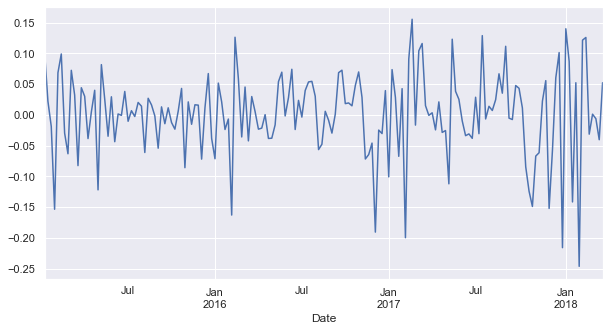

In [41]:
df_date_conventional['AveragePriceDiff'] = df_date_conventional['AveragePrice'] - df_date_conventional['AveragePrice'].shift(1)
df_date_conventional['AveragePriceDiff'].dropna().plot(figsize=(10,5));

In [42]:
from statsmodels.tsa.stattools import adfuller

X = df_date_conventional['AveragePriceDiff'].dropna().values
result = adfuller(X, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if(result[1] > 0.05):
    print("series is non-stationary")
else:
    print("series is stationary")

ADF Statistic: -4.780088
p-value: 0.000059
Critical Values:
	1%: -3.472
	5%: -2.880
	10%: -2.577
series is stationary


In [43]:
# KPSS test
from statsmodels.tsa.stattools import kpss

X = df_date_conventional['AveragePriceDiff'].dropna().values
statistic, p_value, n_lags, critical_values = kpss(X, nlags='auto')
print('ADF Statistic: %f' % statistic)
print('p-value: %f' % p_value)
print('num lags: %f' % n_lags)
print('Critical Values:')
for key, value in critical_values.items():
    print('\t%s: %.3f' % (key, value))

if(p_value > 0.05):
    print("series is stationary")
else:
    print("series is not stationary")

ADF Statistic: 0.046638
p-value: 0.100000
num lags: 2.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
series is stationary


In [44]:
train_size = int(len(df_date_conventional) * 0.75)
train_conventional, test_conventional = df_date_conventional[0:train_size], df_date_conventional[train_size:]

# Arima

- AR: Autoregression
- I: Integrated
- MA: Moving Average

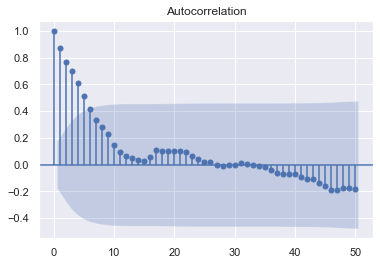

In [45]:
sm.graphics.tsa.plot_acf(train_conventional.AveragePrice, lags=50)
plt.show()

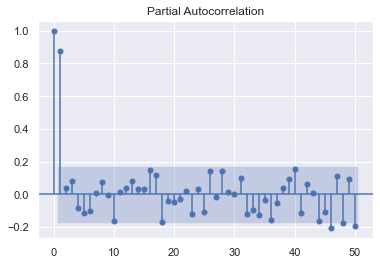

In [46]:
sm.graphics.tsa.plot_pacf(train_conventional.AveragePrice, lags=50)
plt.show()

In [47]:
train_conventional.index = pd.DatetimeIndex(train_conventional.index.values,
                               freq=train_conventional.index.inferred_freq)

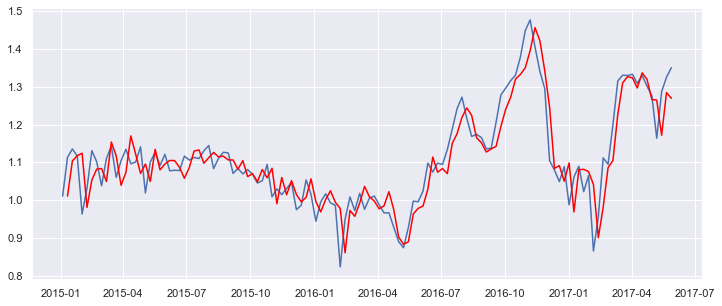

In [48]:
model = ARIMA(train_conventional.AveragePrice, order=(10,1,6))
results_conventional = model.fit()
plt.figure(figsize=(12,5))
plt.plot(train_conventional.AveragePrice);
plt.plot(results_conventional.fittedvalues[1:], color='red');

In [49]:
print("\tMean Squared Error:", mean_squared_error(train_conventional['AveragePrice'], results_conventional.fittedvalues))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(train_conventional['AveragePrice'],results_conventional.fittedvalues)))

	Mean Squared Error: 0.01116961862154383
	Root Mean Squared Error: 0.10568641644763924


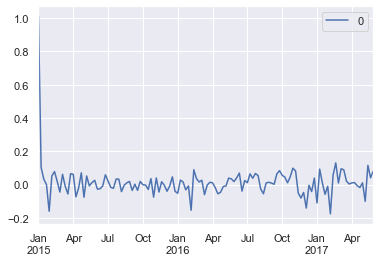

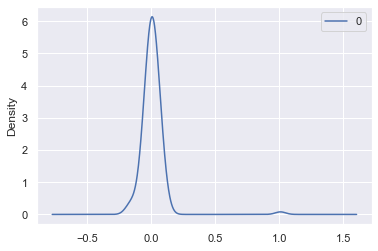

In [50]:
residuals = pd.DataFrame(results_conventional.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [51]:
history = [x for x in train_conventional.AveragePrice]
predictions = list()
test_data = [x for x in test_conventional.AveragePrice]

for i in range(len(test_data)):
    model = ARIMA(history, order=(10,1,6))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.355731, expected=1.340566
predicted=1.325637, expected=1.306792
predicted=1.335712, expected=1.275849
predicted=1.240132, expected=1.237736
predicted=1.212969, expected=1.266415
predicted=1.237952, expected=1.235849
predicted=1.261212, expected=1.364717
predicted=1.353538, expected=1.358113
predicted=1.320421, expected=1.372075
predicted=1.358615, expected=1.379245
predicted=1.363741, expected=1.403962
predicted=1.420005, expected=1.470755
predicted=1.443108, expected=1.506038
predicted=1.496042, expected=1.617547
predicted=1.572956, expected=1.612264
predicted=1.622845, expected=1.604717
predicted=1.603109, expected=1.652453
predicted=1.626322, expected=1.695660
predicted=1.669214, expected=1.706981
predicted=1.713755, expected=1.622642
predicted=1.625676, expected=1.498491
predicted=1.486585, expected=1.349623
predicted=1.325597, expected=1.282642
predicted=1.238105, expected=1.221132
predicted=1.195390, expected=1.243585
predicted=1.255828, expected=1.299245
predicted=1.

In [52]:
print("\tMean Squared Error:", mean_squared_error(test_conventional.AveragePrice, predictions))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(test_conventional.AveragePrice,predictions)))

	Mean Squared Error: 0.007622173639155886
	Root Mean Squared Error: 0.08730506078776812


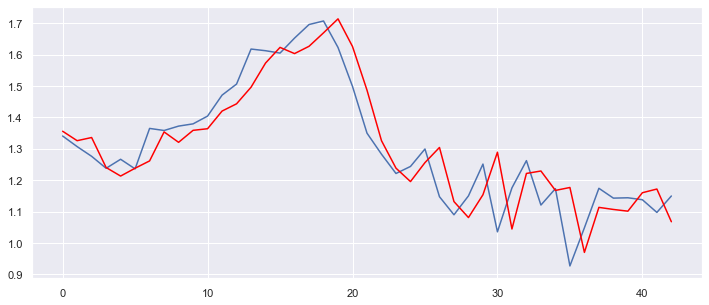

In [53]:
plt.figure(figsize=(12,5))
plt.plot(test_conventional.AveragePrice.values);
plt.plot(predictions, color='red');

## Extra

In [54]:
from statsmodels.tsa.stattools import adfuller

X = df_date['AveragePrice'].dropna().values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if(result[1] > 0.05):
    print("series is non-stationary")
else:
    print("series is stationary")

ADF Statistic: -2.358842
p-value: 0.153691
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
series is non-stationary


In [55]:
# KPSS test
from statsmodels.tsa.stattools import kpss

X = df_date['AveragePrice'].dropna().values
statistic, p_value, n_lags, critical_values = kpss(X)
print('ADF Statistic: %f' % statistic)
print('p-value: %f' % p_value)
print('num lags: %f' % n_lags)
print('Critical Values:')
for key, value in critical_values.items():
    print('\t%s: %.3f' % (key, value))

if(p_value > 0.05):
    print("series is stationary")
else:
    print("series is not stationary")

ADF Statistic: 0.354006
p-value: 0.096980
num lags: 14.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
series is stationary


- Case 1: Both tests conclude that the series is not stationary - The series is not stationary
- Case 2: Both tests conclude that the series is stationary - The series is stationary
- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.